In [2]:
!pip install yfinance

     ---------------------------------------- 0.0/113.7 kB ? eta -:--:--
     --------------------- ----------------- 61.4/113.7 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 113.7/113.7 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 8.9 MB/s eta 0:00:01
     ---- ----------------------------------- 0.3/3.0 MB 5.0 MB/s eta 0:00:01
     -------- ------------------------------- 0.7/3.0 MB 6.0 MB/s eta 0:00:01
     ------------ --------------------------- 0.9/3.0 MB 6.4 MB/s eta 0:00:01
     -------------- ------------------------- 1.1/3.0 MB 6.8 MB/s eta 0:00:01
     -------------- ------------------------- 1.1/3.0 MB 6.8 MB/s eta 0:00:01
     -------------- ------------------------- 1.1/3.0 MB 6.8 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/3.0 MB 4.5 MB/s eta 0:00:01
     --------------------- ------------------ 1.6/3.0 MB 4.6 MB/s eta 0:


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
import yfinance as yf
start_data = "2015-01-01"


end_date = "2023-01-01"
df_og = yf.download("BP.L", start= start_data, end= end_date, interval="1d")

[*********************100%***********************]  1 of 1 completed


In [90]:
df_og.describe()

Price,Close,High,Low,Open,Volume
Ticker,BP.L,BP.L,BP.L,BP.L,BP.L
count,2021.000000,2021.000000,2021.000000,2021.000000,2.021000e+03
mean,422.391016,427.596975,417.243528,422.535028,4.355719e+07
std,90.484571,90.112044,91.369416,90.629740,2.315859e+07
min,193.093292,194.351028,4.674948,191.216662,1.420378e+06
25%,346.432648,352.229013,340.771415,346.964502,2.909534e+07
50%,442.354370,446.825380,437.956626,442.497875,3.752545e+07
75%,491.011108,496.268029,486.549683,491.260347,5.120175e+07
max,596.438293,601.323071,593.547354,600.126769,2.574570e+08


In [91]:
df_og.columns

MultiIndex([( 'Close', 'BP.L'),
            (  'High', 'BP.L'),
            (   'Low', 'BP.L'),
            (  'Open', 'BP.L'),
            ('Volume', 'BP.L')],
           names=['Price', 'Ticker'])

In [92]:
df_og.sample(5)

Price,Close,High,Low,Open,Volume
Ticker,BP.L,BP.L,BP.L,BP.L,BP.L
Date,,,,,
2019-05-13,524.892090,530.676562,523.196625,523.595580,43253294
2015-05-20,449.721069,454.200365,443.205517,448.825811,26462187
2015-02-20,444.288147,446.824367,439.762696,443.591914,31763213
2017-04-27,440.879395,451.835395,439.335607,448.349395,29001118
2021-03-05,318.331116,325.969889,311.232593,312.639517,79113852


In [ ]:
df_og.head(5)

Price,Close,High,Low,Open,Volume
Ticker,BP.L,BP.L,BP.L,BP.L,BP.L
Date,,,,,
2015-01-02,408.172821,413.343953,401.907755,411.653403,19207206
2015-01-05,387.537903,407.263849,385.648420,405.736360,48914106
2015-01-06,388.880554,396.985365,380.576902,388.830844,39403991
2015-01-07,391.565491,397.780816,384.057390,390.869362,42160052
2015-01-08,402.753082,403.896696,393.554401,398.079145,37480336


In [17]:
# df['avrage'] = (df['High'] + df['Low']) / 2

In [123]:
# 23-15 = 8 years
start_data = "2015-01-01"
end_date = "2020-12-30"
Train1 = yf.download("BP.L", start= start_data, end= end_date, interval="1d")
Train1 = Train1.reset_index()


start_data = "2021-01-01"
end_date = "2022-12-30"
Test1 = yf.download("BP.L", start= start_data, end= end_date, interval="1d")
Test1 = Test1.reset_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [94]:
Train1.sample(5)

Price,Close,High,Low,Open,Volume
Ticker,BP.L,BP.L,BP.L,BP.L,BP.L
Date,,,,,
2017-09-28,474.302643,475.099725,469.271191,471.214046,25615983
2016-10-04,465.914368,469.797396,456.405893,457.998939,69658808
2020-05-07,315.292938,320.532849,307.221473,309.653802,46496909
2018-02-14,473.224152,476.811454,470.583509,475.316747,40742940
2016-06-27,393.160278,399.730346,390.024528,391.915943,60909185


In [124]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaler.fit(Train1[['Close']])
data = scaler.transform(Train1[['Close']])

date1 = Train1['Date']
n_input = 60
n_features = 1

# Sequence generator
def create_sequences(data, date, seq_len=n_input):
    X, y ,d1= [], [] ,[]
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i])
        d1.append(date[i])
        
    return np.array(X), np.array(y), np.array(d1)

X_train, y_train, date_train = create_sequences(data,date1,n_input)

In [114]:
y_train.shape

(1456, 1)

In [115]:

# Train1 = Train1.reset_index()

# X_train[:65]

In [125]:
date1_ = Test1['Date']

data_ = scaler.transform(Test1[['Close']])

X_test, y_test, date_test = create_sequences(data_, date1_ , n_input)

In [141]:
date_test[:40]

array([Timestamp('2021-03-29 00:00:00'), Timestamp('2021-03-30 00:00:00'),
       Timestamp('2021-03-31 00:00:00'), Timestamp('2021-04-01 00:00:00'),
       Timestamp('2021-04-06 00:00:00'), Timestamp('2021-04-07 00:00:00'),
       Timestamp('2021-04-08 00:00:00'), Timestamp('2021-04-09 00:00:00'),
       Timestamp('2021-04-12 00:00:00'), Timestamp('2021-04-13 00:00:00'),
       Timestamp('2021-04-14 00:00:00'), Timestamp('2021-04-15 00:00:00'),
       Timestamp('2021-04-16 00:00:00'), Timestamp('2021-04-19 00:00:00'),
       Timestamp('2021-04-20 00:00:00'), Timestamp('2021-04-21 00:00:00'),
       Timestamp('2021-04-22 00:00:00'), Timestamp('2021-04-23 00:00:00'),
       Timestamp('2021-04-26 00:00:00'), Timestamp('2021-04-27 00:00:00'),
       Timestamp('2021-04-28 00:00:00'), Timestamp('2021-04-29 00:00:00'),
       Timestamp('2021-04-30 00:00:00'), Timestamp('2021-05-04 00:00:00'),
       Timestamp('2021-05-05 00:00:00'), Timestamp('2021-05-06 00:00:00'),
       Timestamp('2021-05

In [126]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Input

from tensorflow.keras.layers import GRU, Dense

from tensorflow.keras.metrics import MeanSquaredError, RootMeanSquaredError

# Build the model
# X = Input(shape=(X_train.shape[1], X_train.shape[2]))


model = Sequential([
    GRU(units=64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error' , metrics=[MeanSquaredError(), RootMeanSquaredError()] )


In [127]:

input_layer = Input(shape=(n_input, n_features), name="Input_Layer")  # Input layer

X = GRU(units=64, return_sequences=False, name="GRU_Layer")(input_layer)  # GRU layer

output_layer = Dense(1, name="Output_Layer")(X)                      # Output layer

model1 = Model(inputs=input_layer, outputs=output_layer)  # Create the model

model1.compile(optimizer='adam', loss='mean_squared_error' ,    metrics=[MeanSquaredError(), RootMeanSquaredError()] ) 
               # Specify metrics during compilation)  # Compile the model

In [128]:
# model.fit(X_train, y_train, epochs=30, batch_size=32)#, validation_data=(X_test, y_test))

# Train the model while tracking both training and validation metrics
history = model.fit(
    X_train, y_train,
    epochs=30, 
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1  # Set to 1 to see progress bar and logs
)

Epoch 1/30
46/46 [==============================] - 1s 14ms/step - loss: 0.0469 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.2166 - val_loss: 0.0043 - val_mean_squared_error: 0.0043 - val_root_mean_squared_error: 0.0657
Epoch 2/30
46/46 [==============================] - 0s 8ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566 - val_loss: 0.0019 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0435
Epoch 3/30
46/46 [==============================] - 0s 8ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369 - val_loss: 8.4062e-04 - val_mean_squared_error: 8.4062e-04 - val_root_mean_squared_error: 0.0290
Epoch 4/30
46/46 [==============================] - 0s 8ms/step - loss: 7.7999e-04 - mean_squared_error: 7.7999e-04 - root_mean_squared_error: 0.0279 - val_loss: 5.2782e-04 - val_mean_squared_error: 5.2782e-04 - val_root_mean_squared_error: 0.0230
Epoch 5/30
46/46 [=============================

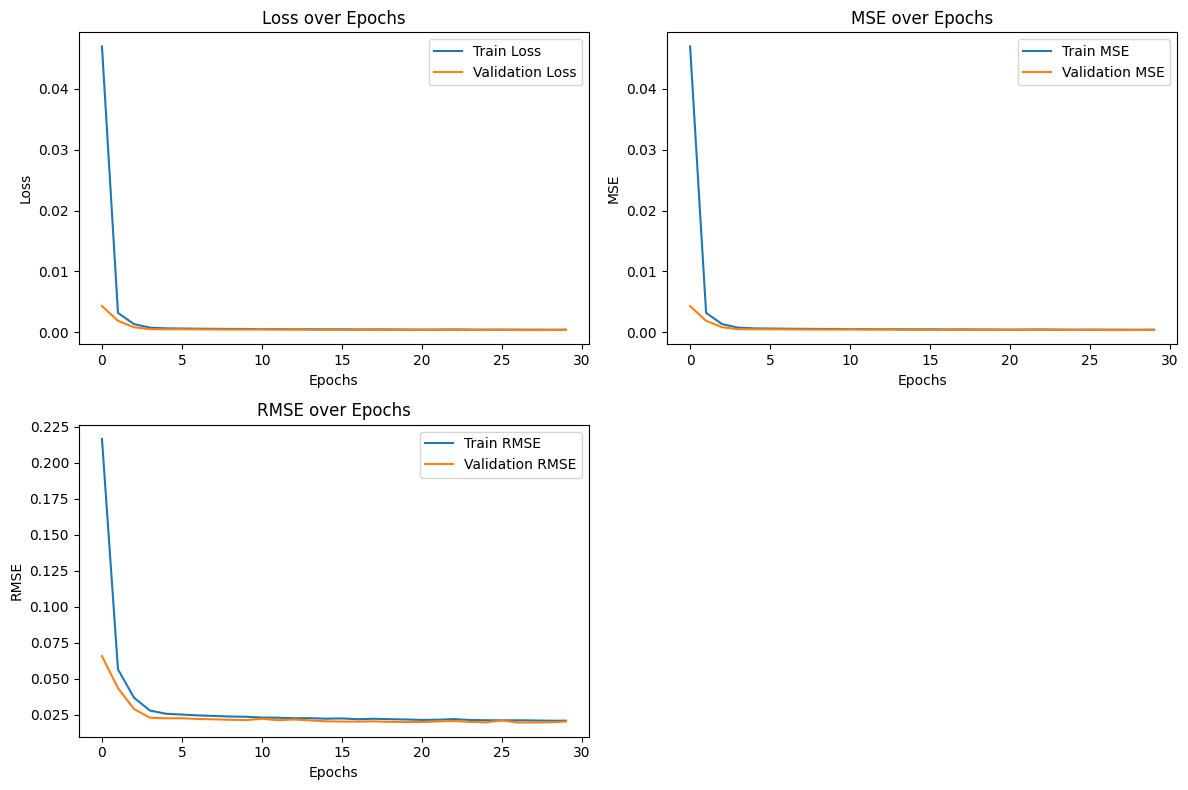

In [129]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12, 8))

# Loss
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MSE
plt.subplot(2, 2, 2)
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('MSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# RMSE
plt.subplot(2, 2, 3)
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('RMSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


In [130]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test)


14/14 [==============================] - 0s 3ms/step


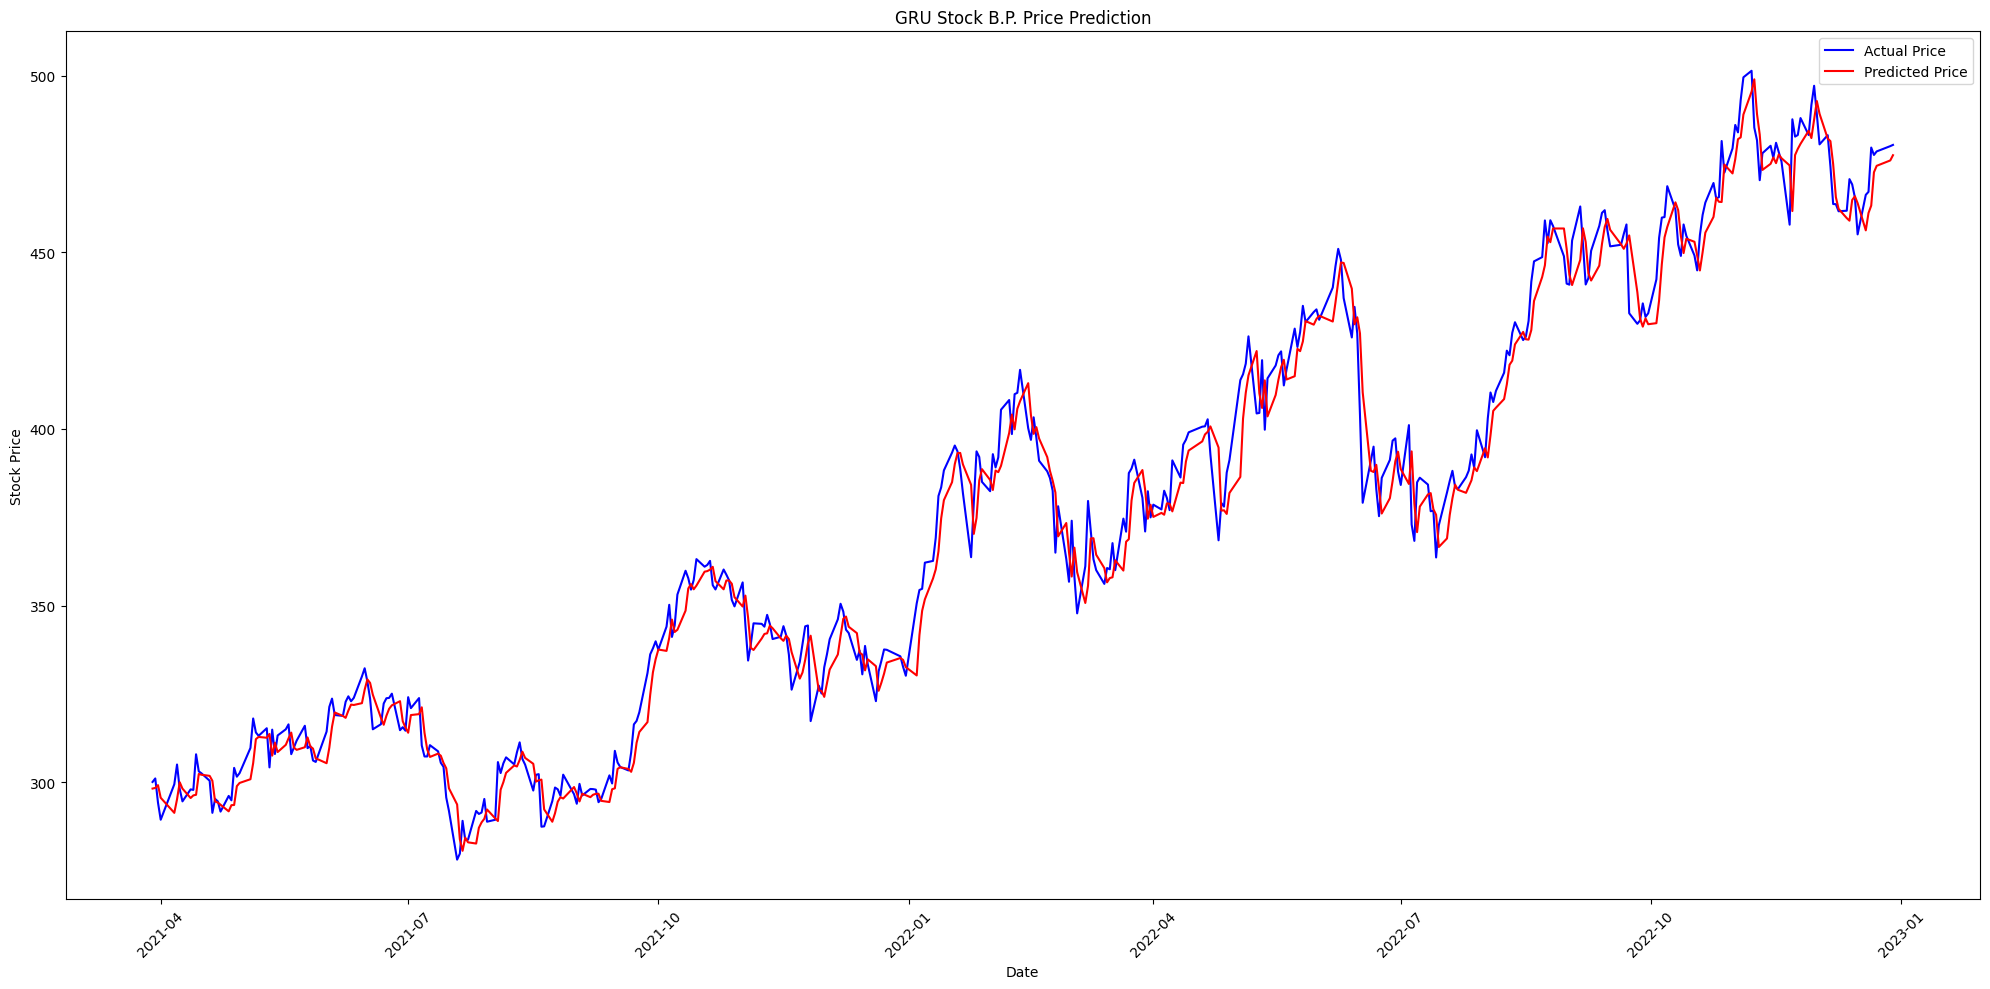

In [131]:
import matplotlib.pyplot as plt
import pandas as pd

start_data = "2021-01-01"

# Generate a date range for the x-axis
# date_range = pd.date_range(start=start_data, periods=len(real_prices), freq='D')

plt.figure(figsize=(20, 10))
# plt.plot(date_range, real_prices, label='Actual Price', color='blue')
# plt.plot(date_range, predicted_prices, label='Predicted Price', color='red')

plt.plot(date_test, real_prices, label='Actual Price', color='blue')
plt.plot(date_test, predicted_prices, label='Predicted Price', color='red')

plt.legend()
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("GRU Stock B.P. Price Prediction")
plt.xticks(rotation=45)  # Rotate for better readability
plt.tight_layout()
plt.show()



In [132]:
predicted_prices[:10]

array([[298.1922 ],
       [298.37466],
       [299.15692],
       [295.58658],
       [291.31512],
       [295.14084],
       [299.97995],
       [298.17502],
       [295.51953],
       [296.25705]], dtype=float32)

In [133]:
real_prices[:10]

array([[300.05801392],
       [301.05654907],
       [294.21661377],
       [289.37380981],
       [299.4090271 ],
       [305.00073242],
       [298.01104736],
       [294.56610107],
       [297.96105957],
       [297.81134033]])

46/46 [==============================] - 0s 3ms/step


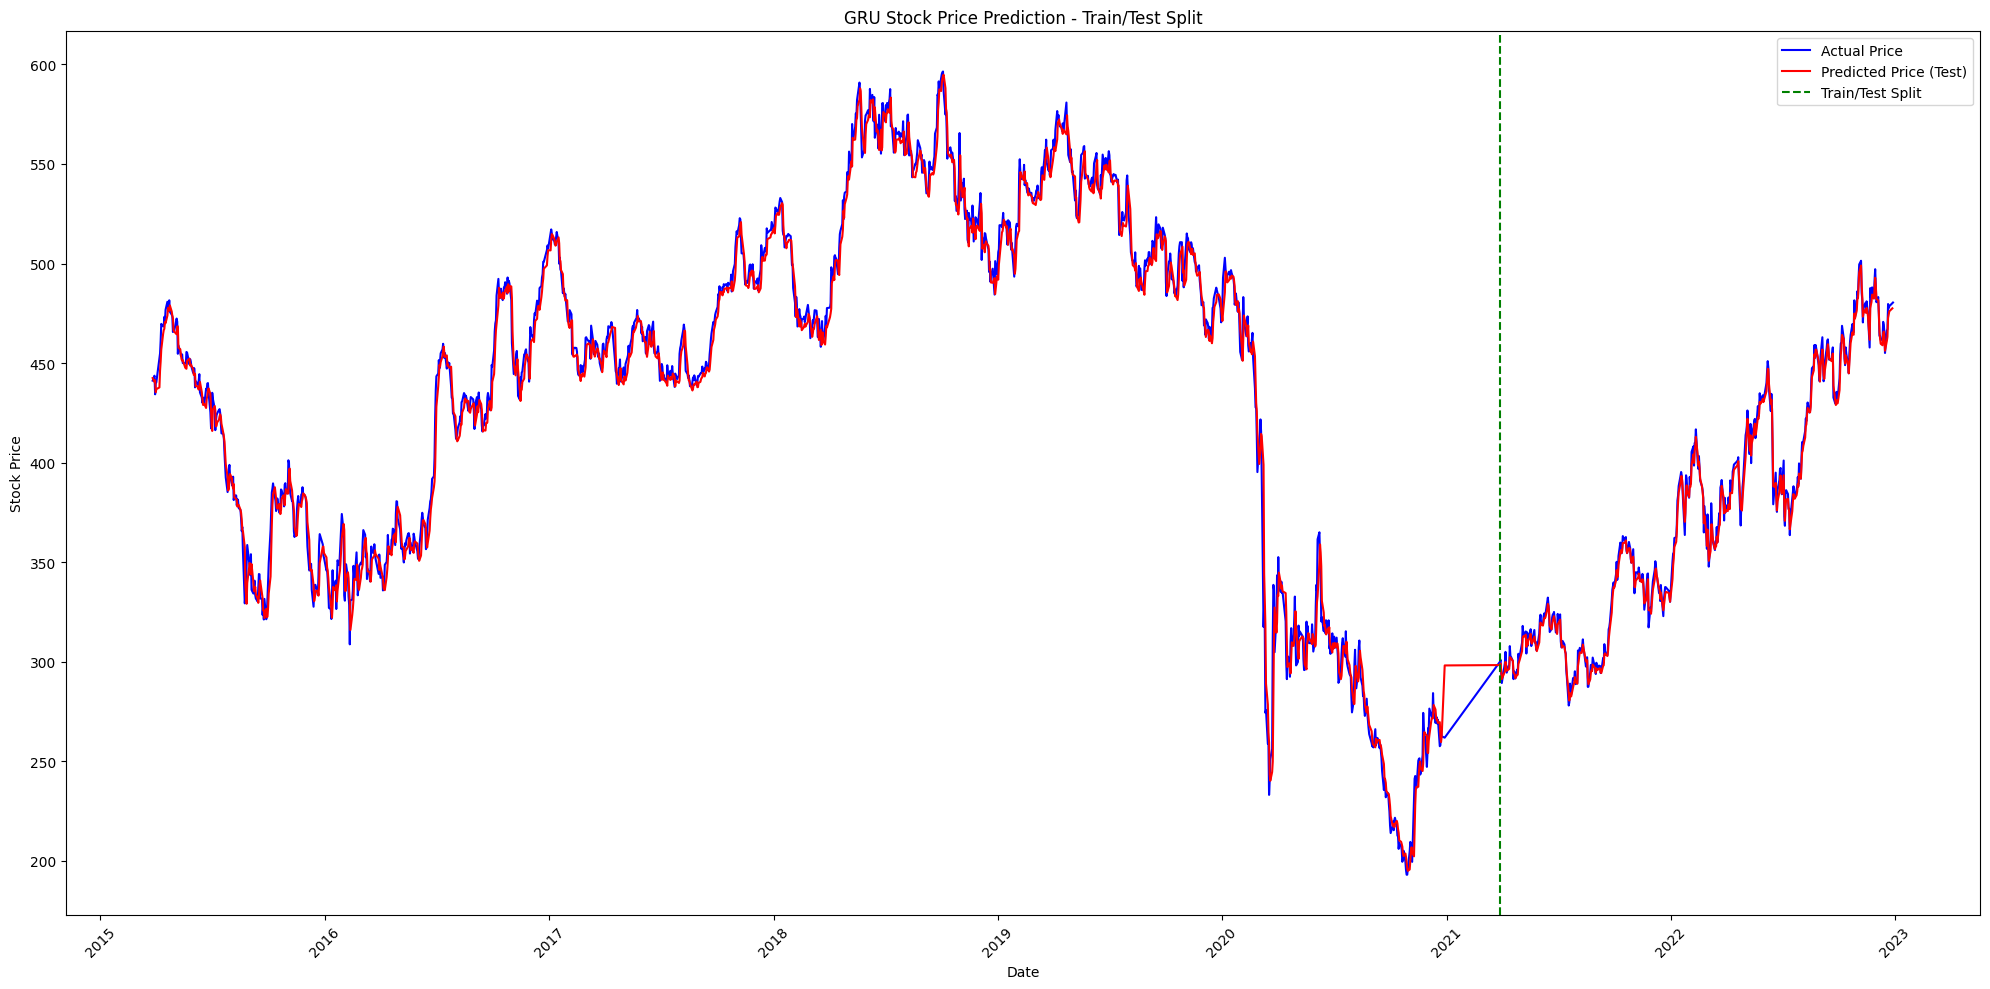

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Reconstruct full timeline
train_size = len(X_train)
test_size = len(X_test)

start_data = "2015-01-01"

# Rebuild the timeline (assuming daily frequency)
# date_range = pd.date_range(start=start_data, periods=train_size + test_size, freq='D')

# Reconstruct full actual prices
full_actual = np.concatenate([y_train, y_test])
full_actual = scaler.inverse_transform(full_actual.reshape(-1, 1)).flatten()

# Build predicted price series (empty for training, filled for test)
full_predicted = np.empty_like(full_actual)
full_predicted[:] = np.nan

full_predicted[train_size-1:-1] = scaler.inverse_transform(predicted).flatten()

predicted1 = model.predict(X_train)
predicted_prices = scaler.inverse_transform(predicted1)
full_predicted[:train_size-1] = predicted_prices.flatten()[:-1]

date_range = date_train.tolist() + date_test.tolist()
date_range = pd.to_datetime(date_range)
# Plot
plt.figure(figsize=(20, 10))
plt.plot(date_range, full_actual, label='Actual Price', color='blue')
plt.plot(date_range, full_predicted, label='Predicted Price (Test)', color='red')
plt.axvline(x=date_range[train_size], color='green', linestyle='--', label='Train/Test Split')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("GRU Stock Price Prediction - Train/Test Split")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [84]:
X_train.shape

(1456, 60, 1)

In [86]:
# X_train[1,:,0].shape
X_train[1,:,0]

array([0.4820803 , 0.48540826, 0.49206524, 0.51980226, 0.50414637,
       0.49896849, 0.49835231, 0.46346514, 0.48923014, 0.54038946,
       0.5294179 , 0.53755413, 0.57157807, 0.57749531, 0.58735775,
       0.60362976, 0.60757443, 0.58871337, 0.56874274, 0.56775665,
       0.60042444, 0.63038077, 0.61928603, 0.6309971 , 0.63222985,
       0.64825573, 0.62175153, 0.62039545, 0.61686086, 0.64127326,
       0.63560192, 0.63584797, 0.63412191, 0.62031313, 0.62277931,
       0.61760068, 0.62684761, 0.62943689, 0.62598477, 0.62610803,
       0.62265576, 0.6274641 , 0.63350542, 0.63732775, 0.62351882,
       0.62031313, 0.57691355, 0.56963918, 0.57136554, 0.55262448,
       0.5510219 , 0.57148887, 0.59664063, 0.60847661, 0.63338247,
       0.62573782, 0.61649111, 0.62684761, 0.62129945, 0.61513495])

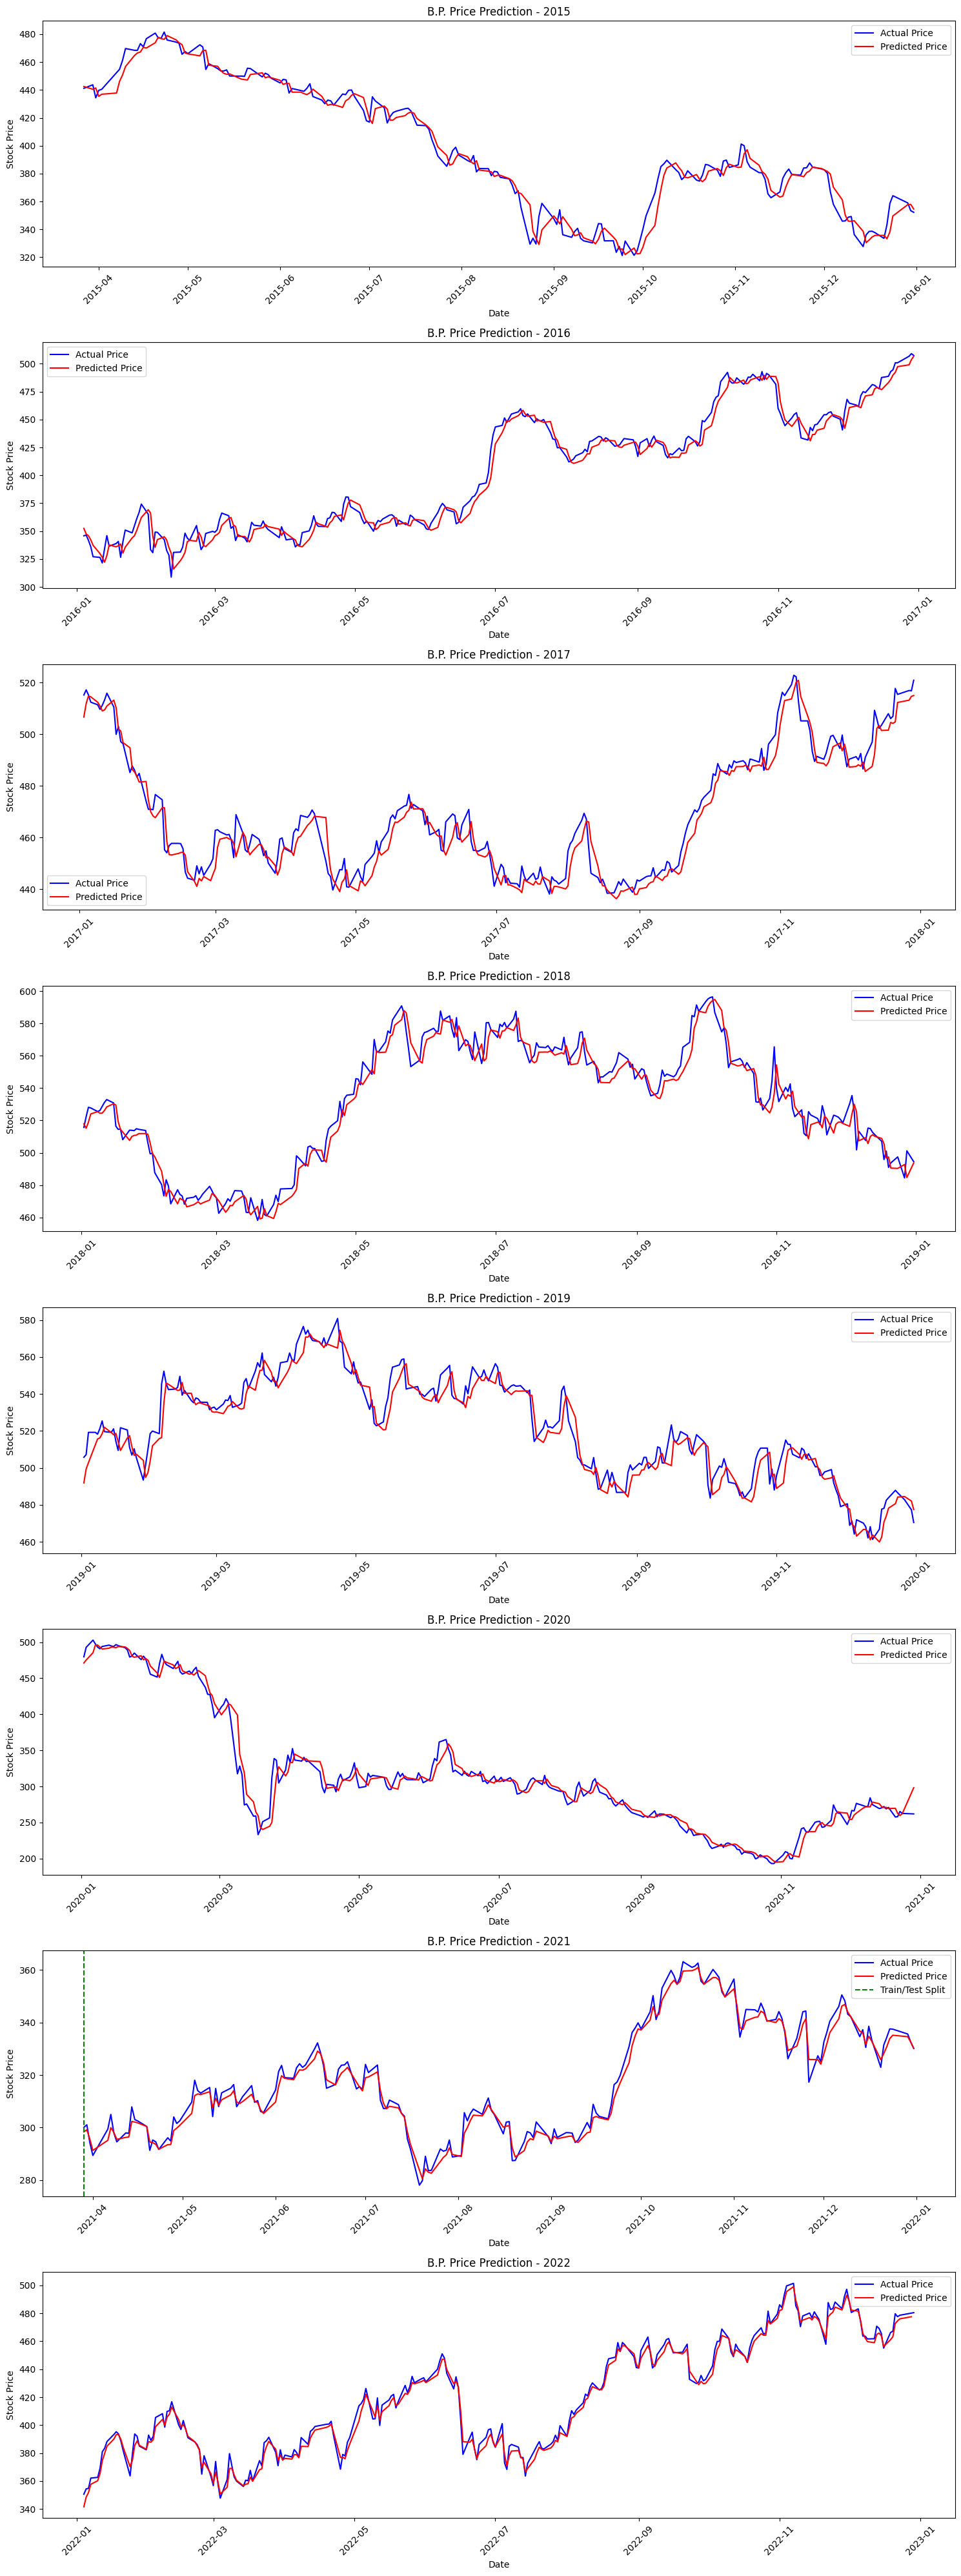

In [137]:

# Create a DataFrame for easier year-based grouping
df = pd.DataFrame({
    'Date': date_range,
    'Actual': full_actual,
    'Predicted': full_predicted
})
df['Year'] = df['Date'].dt.year

# Get unique years (expected: 2015–2019)
years = df['Year'].unique()

# Plot for each year
plt.figure(figsize=(15, 5 * len(years)))  # Adjust height based on number of years
for i, year in enumerate(years, 1):
    # Filter data for the current year
    year_data = df[df['Year'] == year]
    
    # Create subplot
    plt.subplot(len(years), 1, i)
    plt.plot(year_data['Date'], year_data['Actual'], label='Actual Price', color='blue')
    plt.plot(year_data['Date'], year_data['Predicted'], label='Predicted Price', color='red')
    
    # Mark train/test split if it falls within the year
    if year_data['Date'].min() <= date_range[train_size] <= year_data['Date'].max():
        plt.axvline(x=date_range[train_size], color='green', linestyle='--', label='Train/Test Split')
    
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title(f"B.P. Price Prediction - {year}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [138]:
!pip install lime


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from lime import lime_tabular

# Assume your input has shape (samples, time_steps, features)
# Flatten time dimension for LIME (you can also average or extract specific time step if appropriate)
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Create explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_flat,
    mode='regression',
    feature_names=[f"Day{i}_{j}" for i in range(X_train.shape[1]) for j in range(X_train.shape[2])],
    verbose=True
)

# Explain one instance
i = 0
exp = explainer.explain_instance(
    data_row=X_test_flat[i],
    predict_fn=lambda x: model.predict(x.reshape(-1, X_train.shape[1], X_train.shape[2]))
)

# Show explanation
exp.show_in_notebook()


157/157 [==============================] - 0s 3ms/step
Intercept 0.7215059033728635
Prediction_local [0.24349666]
Right: 0.26056814
